In [116]:
import tensorflow as tf
import os

In [114]:
## Since for some reason my jupyter notebook kept crashing everytime I ran it on my GPU so I switched to my CPU instead
## Avoiding OOM errors by setting GPU Memory Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

In [117]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [118]:
# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [
            tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0)])
    except RuntimeError as e:
        print(e)


Visible devices cannot be modified after being initialized


In [120]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [121]:
import cv2
import imghdr

In [122]:
data_dir = 'data'

In [123]:
image_exts = ['jpeg','jpg','bmp','png']

In [124]:
#Removing any dodgy images:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [125]:
import numpy as np
from matplotlib import pyplot as plt

In [126]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 208 files belonging to 2 classes.


In [127]:
data_iterator = data.as_numpy_iterator()

In [128]:
batch = data_iterator.next()

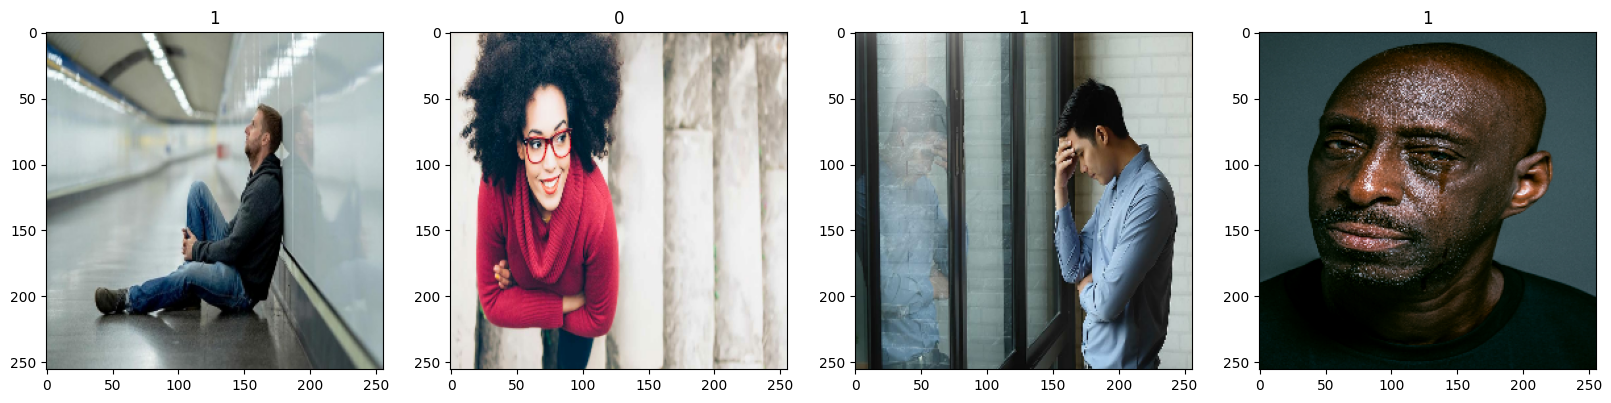

In [129]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [130]:
#We can see that Class 1 denotes sad people and Class 0 denotes happy people

# Preprocess Data

In [131]:
data = data.map(lambda x,y: (x/255, y))

In [132]:
data.as_numpy_iterator().next()


(array([[[[0.09324449, 0.15584406, 0.15482537],
          [0.08027909, 0.14296195, 0.13512744],
          [0.06925341, 0.13204029, 0.11010401],
          ...,
          [0.88754594, 0.9032322 , 0.7606771 ],
          [0.8880352 , 0.90372145, 0.75878996],
          [0.8901961 , 0.90588236, 0.7607843 ]],
 
         [[0.07146139, 0.13028492, 0.09672181],
          [0.06921283, 0.13028054, 0.08749087],
          [0.06065131, 0.12452233, 0.06745851],
          ...,
          [0.89175856, 0.90744483, 0.77306426],
          [0.8906327 , 0.90631896, 0.7665824 ],
          [0.8906327 , 0.90631896, 0.7620941 ]],
 
         [[0.07115503, 0.12997855, 0.04471507],
          [0.06095102, 0.12201873, 0.02303595],
          [0.0550526 , 0.11892362, 0.01260024],
          ...,
          [0.8959712 , 0.91092986, 0.78297335],
          [0.8948453 , 0.9098039 , 0.7791151 ],
          [0.8948453 , 0.9098039 , 0.7754596 ]],
 
         ...,
 
         [[0.11942402, 0.2844133 , 0.08356311],
          [0.23281

In [133]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [134]:
val_size

2

In [135]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building the Deep Learning Model

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [137]:
model = Sequential()

In [138]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [139]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [141]:
#logdir='logs'

In [142]:
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [143]:
#hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
4/4 [==============================] - 5s 1s/step - loss: 1.9154 - accuracy: 0.4844 - val_loss: 0.6480 - val_accuracy: 0.7344
Epoch 2/20
4/4 [==============================] - 5s 950ms/step - loss: 0.7929 - accuracy: 0.5625 - val_loss: 0.6714 - val_accuracy: 0.5469
Epoch 3/20
4/4 [==============================] - 5s 957ms/step - loss: 0.6626 - accuracy: 0.6094 - val_loss: 0.6244 - val_accuracy: 0.7656
Epoch 4/20
4/4 [==============================] - 5s 979ms/step - loss: 0.6246 - accuracy: 0.7344 - val_loss: 0.5311 - val_accuracy: 0.7188
Epoch 5/20
4/4 [==============================] - 5s 958ms/step - loss: 0.6569 - accuracy: 0.5781 - val_loss: 0.6173 - val_accuracy: 0.7031
Epoch 6/20
4/4 [==============================] - 5s 947ms/step - loss: 0.6255 - accuracy: 0.6953 - val_loss: 0.5348 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 5s 965ms/step - loss: 0.5754 - accuracy: 0.6797 - val_loss: 0.6109 - val_accuracy: 0.5938
Epoch 8/20
4/4 [=======

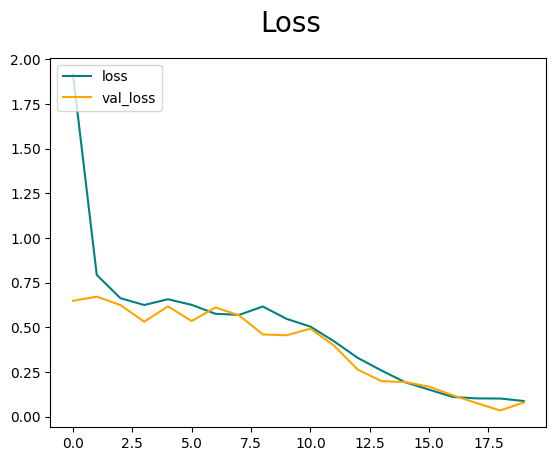

In [144]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

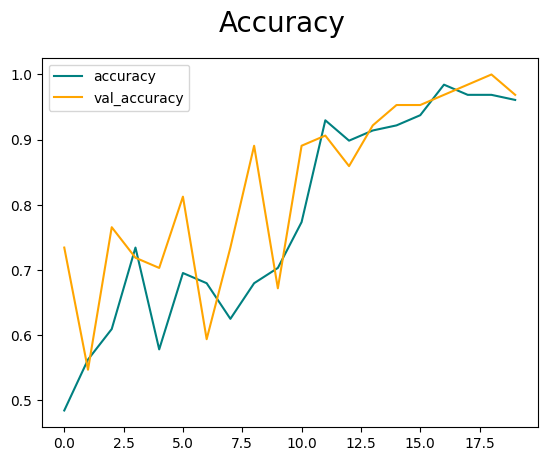

In [145]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Testing on new pictures

In [146]:
import cv2

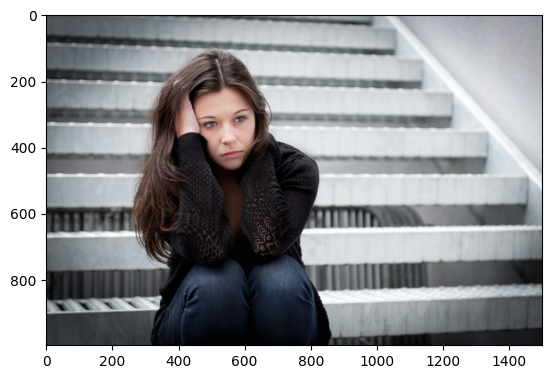

In [147]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

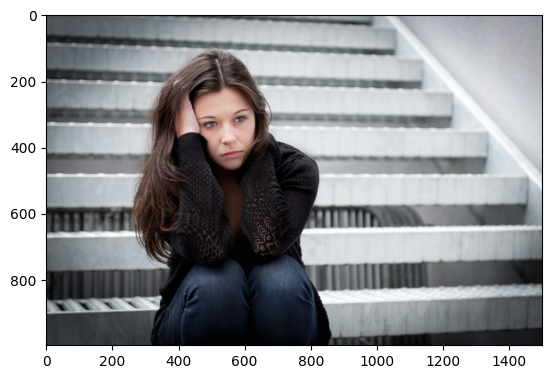

In [148]:
resize = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [149]:
predict = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


In [150]:
predict

array([[0.62022114]], dtype=float32)

In [151]:
if predict > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


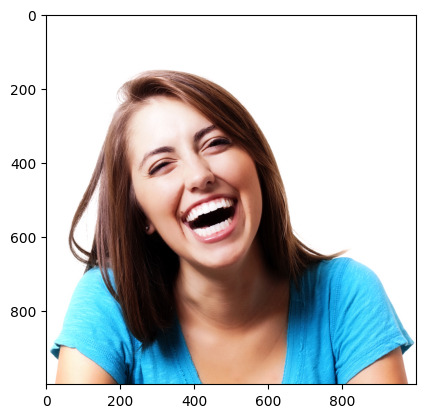

In [152]:
img = cv2.imread('happy_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

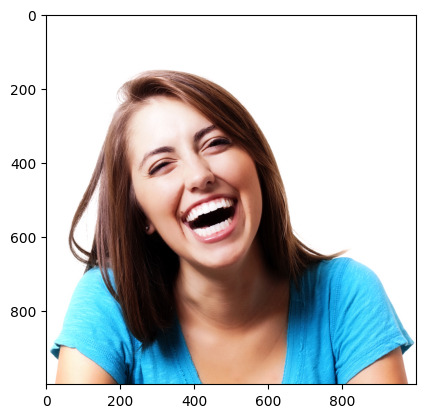

In [153]:
resize = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [154]:
predict = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [155]:
predict

array([[0.05205361]], dtype=float32)

In [156]:
if predict > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [157]:
from tensorflow.keras.models import load_model

In [158]:
model.save("imageclassifier.h5", save_format='h5')